# Indonesian Hatespeech Recognition

### Load data

In [5]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from cleantext import clean
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS

In [78]:
data = pd.read_csv('Data/data.csv', encoding= 'latin-1')
abusive = pd.read_csv('Data/abusive.csv')
alay = pd.read_csv('Data/new_kamusalay.csv', encoding= 'latin-1', names=['original', 'transform'])
stopword_dict = pd.read_csv('Data/stopwordbahasa.csv', names=['stopword'])

In [79]:
data.iloc[:,0]

0        - disaat semua cowok berusaha melacak perhatia...
1        RT USER: USER siapa yang telat ngasih tau elu?...
2        41. Kadang aku berfikir, kenapa aku tetap perc...
3        USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4        USER USER Kaum cebong kapir udah keliatan dong...
                               ...                        
13164    USER jangan asal ngomong ndasmu. congor lu yg ...
13165                         USER Kasur mana enak kunyuk'
13166    USER Hati hati bisu :( .g\n\nlagi bosan huft \...
13167    USER USER USER USER Bom yang real mudah terdet...
13168    USER Mana situ ngasih(": itu cuma foto ya kuti...
Name: Tweet, Length: 13169, dtype: object

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [81]:
list_1 = ['gue', 'haha', 'oh', 'xd', 'xf', 'x', 'ya', 'xe', 'xa', 'sih', 'i', 'a', 'nya', 
          'banget', 'kayak', 'orang', 'wkwk', 'nih', 'saat', 'cowok', 'kawan', 'kadang', 'cigax'
         ,'jifla', 'di saat']
counter = 758
n=0
while n < len(list_1):
    if n == len(list_1):
        break
    for x in list_1:
        stopword_dict.at[counter, 'stopword'] = x
        counter = counter+1
        n = n + 1

In [82]:
data.head(1)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0


In [83]:
data['Tweet'].head()

0    - disaat semua cowok berusaha melacak perhatia...
1    RT USER: USER siapa yang telat ngasih tau elu?...
2    41. Kadang aku berfikir, kenapa aku tetap perc...
3    USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4    USER USER Kaum cebong kapir udah keliatan dong...
Name: Tweet, dtype: object

### Data Cleaning

In [84]:
def Clean(text):
    sms = re.sub('[^0-9a-zA-Z]',' ', text)
    sms = sms.lower()
    sms = re.sub(' +', ' ', sms)
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

data["clean_text"] = data["Tweet"].apply(Clean)
#Lets have a look at a sample of texts after cleaning
print("The First 5 Texts after cleaning: ",*data["clean_text"][:5], sep = "\n")

The First 5 Texts after cleaning: 
disaat semua cowok berusaha melacak perhatian gue loe lantas remehkan perhatian yg gue kasih khusus ke elo basic elo cowok bego
rt user user siapa yang telat ngasih tau elu edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga
41 kadang aku berfikir kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh berkali kali kadang aku merasa tuhan itu ninggalkan aku sendirian ketika orangtuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika aku anak ter
user user aku itu aku n nku tau matamu sipit tapi diliat dari mana itu aku
user user kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah


In [85]:
def unnecessary_char(text):
    sms = re.sub('\\+n', ' ', text)
    sms = re.sub('\n\n', ' ', sms)
    sms = re.sub('rt', ' ', sms)
    sms = re.sub('RT', ' ', sms)
    sms = re.sub('user', ' ', sms)
    sms = re.sub('USER', ' ', sms)
    sms = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',sms) #remove url
    sms = re.sub(':', ' ', sms)
    sms = re.sub(';', ' ', sms)
    sms = re.sub('\n', ' ', sms)
    sms = re.sub('\\+', ' ', sms)
    sms = re.sub(r"\d+", "", sms) #remove angka
    sms = sms.translate(str.maketrans('', '', string.punctuation))
    sms = re.sub(' +', ' ', sms) #remove extra space
    return sms

data["clean_text"] = data["clean_text"].apply(unnecessary_char)
print("The First 5 Texts after cleaning: ",*data["clean_text"][:5], sep = "\n")

The First 5 Texts after cleaning: 
disaat semua cowok berusaha melacak perhatian gue loe lantas remehkan perhatian yg gue kasih khusus ke elo basic elo cowok bego
 siapa yang telat ngasih tau elu edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga
 kadang aku berfikir kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh berkali kali kadang aku merasa tuhan itu ninggalkan aku sendirian ketika orangtuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika aku anak ter
 aku itu aku n nku tau matamu sipit tapi diliat dari mana itu aku
 kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah


In [86]:
#tokenize
data['Tokenize_text'] = data.apply(lambda row: nltk.word_tokenize(row['clean_text']), axis=1)

In [87]:
#normalize kata kata alay
alay_dict_map = dict(zip(alay['original'], alay['transform']))
def normalize(text):
    sms = [alay_dict_map[word] if word in alay_dict_map.keys() else word for word in text]
    return sms

data['Tokenize_text'] = data['Tokenize_text'].apply(normalize)
print("The First 5 Texts after normalize:",*data["Tokenize_text"][:5], sep = "\n")

The First 5 Texts after normalize:
['di saat', 'semua', 'cowok', 'berusaha', 'melacak', 'perhatian', 'gue', 'kamu', 'lantas', 'remehkan', 'perhatian', 'yang', 'gue', 'kasih', 'khusus', 'ke', 'kamu', 'basic', 'kamu', 'cowok', 'bego']
['siapa', 'yang', 'telat', 'memberi', 'tau', 'kamu', 'edan', 'sarap', 'gue', 'bergaul', 'dengan', 'cigax', 'jifla', 'calis', 'sama', 'siapa', 'itu', 'licew', 'juga']
['kadang', 'aku', 'berpikir', 'kenapa', 'aku', 'tetap', 'percaya', 'pada', 'tuhan', 'padahal', 'aku', 'selalu', 'jatuh', 'berkali', 'kali', 'kadang', 'aku', 'merasa', 'tuhan', 'itu', 'meninggalkan', 'aku', 'sendirian', 'ketika', 'orang tuaku', 'berencana', 'berpisah', 'ketika', 'kakakku', 'lebih', 'memilih', 'jadi', 'kristen', 'ketika', 'aku', 'anak', 'ter']
['aku', 'itu', 'aku', 'dan', 'ku', 'tau', 'matamu', 'sipit', 'tapi', 'dilihat', 'dari', 'mana', 'itu', 'aku']
['kaum', 'cebong', 'kafir', 'sudah', 'kelihatan', 'dongoknya', 'dari', 'awal', 'tambah', 'dungu', 'lagi', 'haha']


In [88]:
#remove stopword
def remove_stopword(text):
    sms = [word for word in text if word not in stopword_dict.stopword.values]
    return sms

data["Nostopword_Text"] = data["Tokenize_text"].apply(remove_stopword)
print("The First 5 Texts after remove stopword:",*data["Nostopword_Text"][:5], sep = "\n")

The First 5 Texts after remove stopword:
['berusaha', 'melacak', 'perhatian', 'lantas', 'remehkan', 'perhatian', 'kasih', 'khusus', 'basic', 'bego']
['telat', 'tau', 'edan', 'sarap', 'bergaul', 'calis', 'licew']
['berpikir', 'percaya', 'tuhan', 'jatuh', 'berkali', 'kali', 'tuhan', 'meninggalkan', 'orang tuaku', 'berencana', 'berpisah', 'kakakku', 'memilih', 'kristen', 'anak', 'ter']
['ku', 'tau', 'matamu', 'sipit']
['kaum', 'cebong', 'kafir', 'dongoknya', 'dungu']


In [89]:
data.head(3)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,clean_text,Tokenize_text,Nostopword_Text
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian ...,"[di saat, semua, cowok, berusaha, melacak, per...","[berusaha, melacak, perhatian, lantas, remehka..."
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat ngasih tau elu edan sarap gu...,"[siapa, yang, telat, memberi, tau, kamu, edan,...","[telat, tau, edan, sarap, bergaul, calis, licew]"
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berfikir kenapa aku tetap percaya ...,"[kadang, aku, berpikir, kenapa, aku, tetap, pe...","[berpikir, percaya, tuhan, jatuh, berkali, kal..."


In [90]:
#ubah menjadi kalimat
new_tweet = []
for word in data['Nostopword_Text']:
    msg = ' '.join([x for x in word])
    new_tweet.append(msg)
    
print("The First 5 lines in new_tweet :",*new_tweet[:5], sep = "\n")

The First 5 lines in new_tweet :
berusaha melacak perhatian lantas remehkan perhatian kasih khusus basic bego
telat tau edan sarap bergaul calis licew
berpikir percaya tuhan jatuh berkali kali tuhan meninggalkan orang tuaku berencana berpisah kakakku memilih kristen anak ter
ku tau matamu sipit
kaum cebong kafir dongoknya dungu


In [91]:
data = pd.concat([data, pd.DataFrame(new_tweet, columns=['Tweet Clean'], index=data.index)], axis=1)
data.head(1)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,clean_text,Tokenize_text,Nostopword_Text,Tweet Clean
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian ...,"[di saat, semua, cowok, berusaha, melacak, per...","[berusaha, melacak, perhatian, lantas, remehka...",berusaha melacak perhatian lantas remehkan per...


In [32]:
#def lematize(textt):
    #factory = StemmerFactory()
    #stemmer = factory.create_stemmer()
    #lemas = [stemmer.stem(x) for x in textt]
    #return lemas

#data = pd.concat([data, pd.DataFrame(lematize(new_tweet), columns=['New_Tweet'], index=data.index)], axis=1)

In [92]:
def classify(hs):
    hasil = ' '
    if int(hs) == 1:
        hasil = 'positive' # hate speech label
    else:
        hasil = 'negative' # non hate speech label
    return hasil

data['HS_Class'] = data['HS'].apply(classify)

In [95]:
data[['Tweet Clean', 'HS_Class']].sample(3)

,Tweet Clean,HS_Class
621,sabar adik kunyuk bau sempak kuda,negative
8727,tidak apa apa lihat kontol gratis skip cuci ma...,negative
6068,hipotesis nama asli kerajaan padjadjaran padja...,negative


In [96]:
dataku = data[['Tweet Clean', 'HS_Class']]
dataku.head(3)

,Tweet Clean,HS_Class
0,berusaha melacak perhatian lantas remehkan per...,positive
1,telat tau edan sarap bergaul calis licew,negative
2,berpikir percaya tuhan jatuh berkali kali tuha...,negative


#### cek dimensi data

In [97]:
dataku.shape

(13169, 2)

#### cek duplikat data

In [98]:
dataku.duplicated().sum()

491

In [99]:
dataku = dataku.drop_duplicates()
dataku.shape

(12678, 2)

In [100]:
dataku.duplicated().sum()

0

#### cek presentase null values

In [101]:
dataku.isnull().sum()/dataku.shape[0]

Tweet Clean    0.0
HS_Class       0.0
dtype: float64

In [102]:
# buat kolom total karakter dan total kalimat
dataku['total_karakter'] = dataku['Tweet Clean'].apply(len)
dataku['total_word'] = dataku['Tweet Clean'].apply(lambda x: len(x.split()))

In [103]:
dataku.head(3)

,Tweet Clean,HS_Class,total_karakter,total_word
0,berusaha melacak perhatian lantas remehkan per...,positive,76,10
1,telat tau edan sarap bergaul calis licew,negative,40,7
2,berpikir percaya tuhan jatuh berkali kali tuha...,negative,124,17


In [46]:
dataku.to_csv('project.csv', index=False, columns=['Tweet Clean', 'HS_Class'])

#### Univariate Analysis

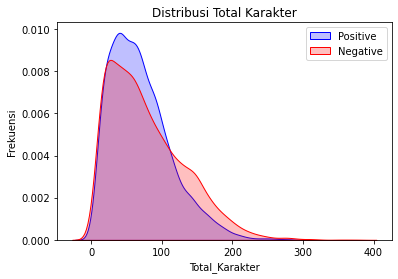

In [106]:
g = sns.kdeplot(dataku.total_karakter[(dataku["HS_Class"] == 'positive') ], color="Blue", shade = True)
g = sns.kdeplot(dataku.total_karakter[(dataku["HS_Class"] == 'negative') ], color="Red", shade= True)
g.set_xlabel("Total_Karakter")
g.set_ylabel("Frekuensi")
plt.title('Distribusi Total Karakter')
g = g.legend(['Positive', 'Negative'])

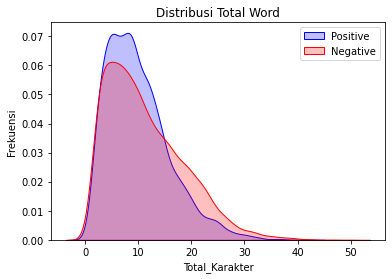

In [108]:
g = sns.kdeplot(dataku.total_word[(dataku["HS_Class"] == 'positive') ], color="Blue", shade = True)
g = sns.kdeplot(dataku.total_word[(dataku["HS_Class"] == 'negative') ], color="Red", shade= True)
g.set_xlabel("Total_Karakter")
g.set_ylabel("Frekuensi")
plt.title('Distribusi Total Word')
g = g.legend(['Positive', 'Negative'])

In [47]:
#measure of central tendency
def statistika(tk,tw):
    mean_total_karakter = tk.mean()
    mean_total_word = tw.mean()
    median_total_karakter = tk.median()
    median_total_word = tw.median()
    modus_total_karakter = tk.mode()[0]
    modus_total_word = tw.mode()[0]
    print({'mean_total_karakter':round(mean_total_karakter,1),
          'mean_total_word':round(mean_total_word,1),
          'median_total_karakter':median_total_karakter,
          'median_total_word':median_total_word,
          'modus_total_karakter':modus_total_karakter,
          'modus_total_word':modus_total_word})

statistika(dataku['total_karakter'], dataku['total_word'])

{'mean_total_karakter': 74.6, 'mean_total_word': 10.7, 'median_total_karakter': 65.0, 'median_total_word': 9.0, 'modus_total_karakter': 17, 'modus_total_word': 5}


In [48]:
#measure of spread

def spread(tk):
    range_tk = tk.max() - tk.min()
    p0 = tk.min()
    p100 = tk.max()
    q1 = tk.quantile(0.25)
    q2 = tk.quantile(0.50)
    q3 = tk.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    print('STATISTIKA TOTAL KARAKTER')
    print('batas bawah total_karakter: ',lower_limit)
    print('nilai minimum: ', p0)
    if lower_limit < p0:
        print('tidak ada outlier dari sisi batas bawah')
    else:
        print('ada outlier dari sisi batas bawah')
    print()    
    print('***')
    print()
    print('batas atas total_karakter: ', upper_limit)
    print('nilai maksimum: ', p100)
    if upper_limit > p100:
        print('tidak ada outlier dari sisi batas atas')
    else:
        print('ada outlier dari sisi batas atas')
        
spread(dataku['total_karakter'])

STATISTIKA TOTAL KARAKTER
batas bawah total_karakter:  -64.5
nilai minimum:  0
tidak ada outlier dari sisi batas bawah

***

batas atas total_karakter:  203.5
nilai maksimum:  377
ada outlier dari sisi batas atas


In [25]:
def spread_tw(tw):
    range_tw = tw.max() - tw.min()
    p0 = tw.min()
    p100 = tw.max()
    q1 = tw.quantile(0.25)
    q2 = tw.quantile(0.50)
    q3 = tw.quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    print('STATISTIKA TOTAL WORD')
    print('batas bawah total_word: ',lower_limit)
    print('nilai minimum: ', p0)
    if lower_limit < p0:
        print('tidak ada outlier dari sisi batas bawah')
    else:
        print('ada outlier dari sisi batas bawah')
    print()    
    print('***')
    print()
    print('batas atas total_word: ', upper_limit)
    print('nilai maksimum: ', p100)
    if upper_limit > p100:
        print('tidak ada outlier dari sisi batas atas')
    else:
        print('ada outlier dari sisi batas atas')
        
spread_tw(dataku['total_word'])

STATISTIKA TOTAL WORD
batas bawah total_word:  -10.0
nilai minimum:  0
tidak ada outlier dari sisi batas bawah

***

batas atas total_word:  30.0
nilai maksimum:  50
ada outlier dari sisi batas atas


In [49]:
def var_std(tk,tw):
    varians_tk = round(tk.var(),1)
    varians_tw = round(tw.var(),1)
    std_tk = round(tk.std(),1)
    std_tw = round(tw.std(),1)
    print('VARIANS')
    print('varians total karakter: ', varians_tk)
    print('varians total word: ', varians_tw)
    print()
    print('***')
    print()
    print('STANDAR DEVIASI')
    print('standar deviasi total karakter: ', std_tk)
    print('standar deviasi total word: ', std_tw)
    
var_std(dataku['total_karakter'], dataku['total_word'])

VARIANS
varians total karakter:  2470.6
varians total word:  46.3

***

STANDAR DEVIASI
standar deviasi total karakter:  49.7
standar deviasi total word:  6.8


In [27]:
def skew_kurt(tk,tw):
    skew_tk = round(tk.skew(),1)
    skew_tw = round(tw.skew(),1)
    kurt_tk = round(tk.kurtosis(),1)
    kurt_tw = round(tw.kurtosis(),1)
    print('SKEWNESS')
    print('skewness total karakter: ', skew_tk)
    print('skewness total word: ', skew_tw)
    print()
    print('***')
    print()
    print('KURTOSIS')
    print('kurtosis total karakter: ', kurt_tk)
    print('kurtosis total word: ', kurt_tw)
    
    
    
skew_kurt(dataku['total_karakter'], dataku['total_word'])

SKEWNESS
skewness total karakter:  1.0
skewness total word:  1.0

***

KURTOSIS
kurtosis total karakter:  1.1
kurtosis total word:  1.0


In [122]:
def plot_wordcloud(text, max_words=200, max_font_size=100, figure_size=(14.0,8.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200)
    wordcloud.generate(str(text))
    
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


### Data Visualisasi

In [123]:
viz = dataku[['Tweet Clean', 'HS_Class']]
temp = viz.groupby(['HS_Class'])['Tweet Clean'].count().reset_index().sort_values(by=['Tweet Clean'], ascending=False)
temp

,HS_Class,Tweet Clean
0,negative,7322
1,positive,5356


<AxesSubplot:xlabel='HS_Class', ylabel='Tweet Clean'>

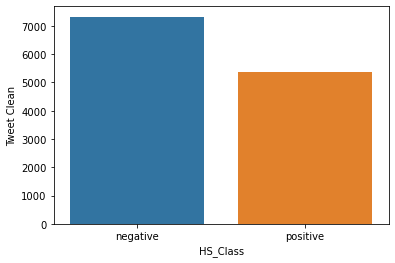

In [124]:
sns.barplot(x='HS_Class', y='Tweet Clean', data=temp)

In [125]:
data_negative = dataku.loc[dataku['HS_Class']=='negative']
data_negative.head(3)

,Tweet Clean,HS_Class,total_karakter,total_word
1,telat tau edan sarap bergaul calis licew,negative,40,7
2,berpikir percaya tuhan jatuh berkali kali tuha...,negative,124,17
3,ku tau matamu sipit,negative,19,4


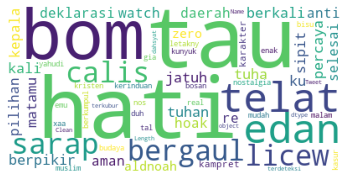

In [126]:
plot_wordcloud(data_negative['Tweet Clean'], max_words=200, max_font_size=100, figure_size=(14.0,8.0), color = 'white',
                   title = None, title_size=40, image_color=False)

In [127]:
data_positive = dataku.loc[dataku['HS_Class']=='positive']
data_positive.head(3)

,Tweet Clean,HS_Class,total_karakter,total_word
0,berusaha melacak perhatian lantas remehkan per...,positive,76,10
4,kaum cebong kafir dongoknya dungu,positive,33,5
5,bani taplak dan kawan kawan,positive,27,5


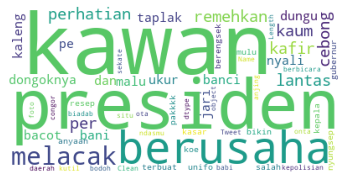

In [128]:
plot_wordcloud(data_positive['Tweet Clean'], max_words=200, max_font_size=100, figure_size=(14.0,8.0), color = 'white',
                   title = None, title_size=40, image_color=False)